# Python Homework 4

**Release date:** Thursday, August 31st <br>
**Due date:** Wednesday, __September 6th__, 11:59 p.m. via Gradescope

**Instruction:** Please upload your ipynb file on Gradescope with filename "PythonHW4_YOURPERMNUMBER".

__Background:__ Markov chains could be used to model a plethora of phenomena that happen in our world. The only assumption that we would have to accept is the fact that what we are trying to model depends only on the last step, and not on all previous steps (the whole history).

For example, Sahin and Sen (2001) model hourly wind speeds in a NW part of Turkey as a Markov chain ${(X_n)}_{n\in \mathbb{N}}$ with 7 states representing different wind speed levels. Since in Python arrays are indexed starting from $0$, let us consider the states to be $S=\{0,1,2,3,4,5,6 \}$, with $0$ representing the lowest wind speed level. The transition matrix is given by:

\begin{gather*}
P=\begin{array}{cccccccc}
& 0 & 1 & 2 & 3 & 4 & 5 & 6 \\
0 & 0.756 & 0.113 & 0.129 & 0.002 & 0 & 0 & 0\\
1 & 0.174 & 0.821 & 0.004 & 0.001 & 0 & 0 & 0\\
2 & 0.141 & 0.001 & 0.776 & 0.082 & 0 & 0 & 0\\
3 & 0.003 & 0 & 0.192 & 0.753 & 0.052 & 0 & 0\\
4 & 0 & 0 & 0.002 & 0.227 & 0.735 & 0.036 & 0\\
5 & 0 & 0 & 0 & 0.007 & 0.367 & 0.604 & 0.022\\
6 & 0 & 0 & 0 & 0 & 0.053 & 0.158 & 0.789\\
\end{array}
\end{gather*}

As usual, we start with loading some packages:

In [4]:
import numpy as np
import pandas as pd
from numpy import linalg
import scipy.linalg
import matplotlib.pyplot as plt

### Part a (10 Points)

Implement the transition probability matrix $P$ from above as a two dimensional <tt>numpy.array()</tt>.

In [5]:
# Initiate the transition matrix P
P = np.array([
    [0.756, 0.113, 0.129, 0.002, 0, 0, 0],
    [0.174, 0.821, 0.004, 0.001, 0, 0, 0],
    [0.141, 0.001, 0.776, 0.082, 0, 0, 0],
    [0.003, 0, 0.192, 0.753, 0.052, 0, 0],
    [0, 0, 0.002, 0.227, 0.735, 0.036, 0],
    [0, 0, 0, 0.007, 0.367, 0.604, 0.022],
    [0, 0, 0, 0, 0.053, 0.158, 0.789]
])

Assume that the wind speed in State $i$ is $5 \cdot i$ Miles/hr. So there is no wind in state 0 and 30 M/hr wind in state 6. Given that there is no wind today, find the **expected wind speed** in (i) 2 days' time; (ii) 1 week's time. Be sure to print out any powers of the matrix P that you use to answer the question.

In [8]:
# Define the initial state: no wind today
initial_s = np.array([1,0,0,0,0,0,0])

# Compute the probability after 2 days
p_matrix_after_2_days = np.linalg.matrix_power(P,2)

# Define the wind speed in each state
wind_speed = np.arange(7)*5

# Calculate the expected wind peed in 2 days using dot product
Expectation2 = initial_s.dot(p_matrix_after_2_days).dot(wind_speed)

# Compute the probability after a week
p_matrix_after_7_days = np.linalg.matrix_power(P,7)

# Calculate the expected wind peed in one week using dot product
ExpectationWeek = initial_s.dot(p_matrix_after_7_days).dot(wind_speed)

print("The expected wind speed in 2 days is " + str(round(Expectation2,4)) + " mph")
print("The expected wind speed in 1 week is " + str(round(ExpectationWeek,4)) + " mph")

The expected wind speed in 2 days is 3.084 mph
The expected wind speed in 1 week is 5.3064 mph


### Part b (5 Points)

We fix $X_0 = 0$ (no wind today) and wish to compute $H_n := \mathbb{P}(X_n = 6 | X_0 = 0)$ which is the probability that there will be strong wind $n$ days from now. Using a <tt>for</tt> loop, evaluate $H_n$ for $n=1,2,\ldots,60$, i.e for 1,2, and up to 60 days into the future.

Create a plot showing $H_n$ as a function of $n$. Summarize what you observe.

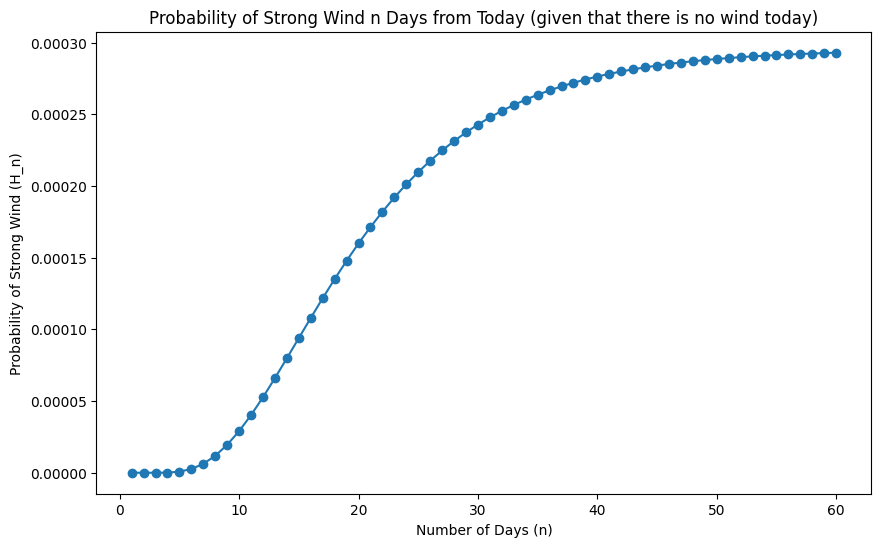

In [17]:
# WRITE YOUR OWN CODE HERE! FEEL FREE TO INSERT MORE CELLS!
# BE SURE TO ADD SOME COMMENTS TO YOUR CODE!
# Evaluate H_n for n = 1, 2,..., 60:
days = 60 # 60 days
H_n = [] # create empty list to store probabilities each n days from now

# Initial state: no wind
initial_state = np.array([1, 0, 0, 0, 0, 0, 0])

strong_wind = 6 # state 6
# Create a loop to evaluate H_n
for n in range(1,days +1):
  # Compute the probability after n days
  p_matrix_after_n_days = np.linalg.matrix_power(P,n)
  # Calculate the probability of being in strong wind after n days
  p_strong_wind = initial_state.dot(p_matrix_after_n_days)[strong_wind]
  H_n.append(p_strong_wind )

# WRITE CODE TO PLOT H_n as a function of n
plt.figure(figsize=(10, 6))
plt.plot(range(1, days + 1), H_n, marker='o')
plt.xlabel('Number of Days (n)')
plt.ylabel('Probability of Strong Wind (H_n)')
plt.title('Probability of Strong Wind n Days from Today (given that there is no wind today)') # title of plot
plt.show()

Summary of Observations: From the graph, it is clearly that the probability of strong wind  follows a positive relationship with number of days. The increasing trend indicates that the likelihood of experiencing strong wind conditions becomes higher over time. However, by considering the convergence from the graph, the probability tend to be constant as the number of days increase. That is to say, there may be a steady-state probability for strong wind for long-term.

### Part c (5 pt)

Let $W$ be the *first* day (i.e. step $n$) that there is NO wind.  Write a function **simulateFirstCalmDay** to do a Monte Carlo simulation of $W$. Starting with **$X_0 = 5$** today, run your function with $M=1000$ simulations to obtain a (i) histogram of $W$; (ii) estimate the expected value of $W$.

In [25]:
# WRITE YOUR OWN CODE HERE! FEEL FREE TO INSERT MORE CELLS!
# BE SURE TO ADD SOME COMMENTS TO YOUR CODE!
np.random.seed(160)

def simulateFirstCalmDay(M):
  # Define the inital state
  X0 = 5
  # To store W (the first day that there is NO wind)
  W = []
  # Perform Monte Carlo simulation M times
  for _ in range(M):
    x = X0 # Start with initial state
    n = 0 # Initialize the days

    while x != 0:
      n += 1 # add one day
      x = np.random.choice(np.arange(7), p = P[x]) # simulate the next day's state

    W.append(n)

  return W

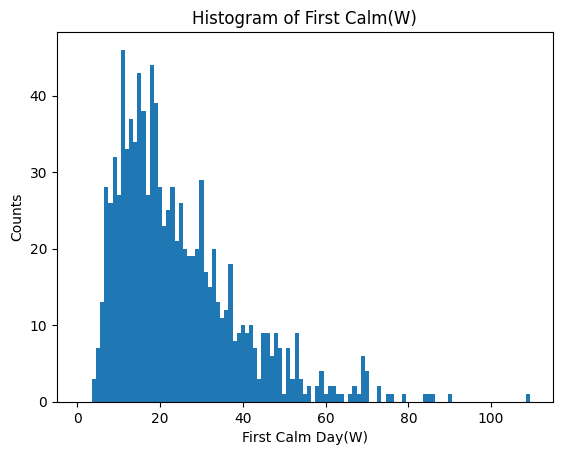

In [26]:
# PLOT THE HISTOGRAM OF W
# BE SURE TO ADD SOME COMMENTS TO YOUR CODE!
M = 1000
W_values = simulateFirstCalmDay(M)
plt.hist(W_values, bins = range(1,max(W_values) + 1), align='left')
plt.xlabel('First Calm Day(W)')
plt.ylabel('Counts')
plt.title('Histogram of First Calm(W)')
plt.show()

In [27]:
# WRITE YOUR OWN CODE HERE! FEEL FREE TO INSERT MORE CELLS!
# BE SURE TO ADD SOME COMMENTS TO YOUR CODE!
estimated_expected_W = np.mean(W_values)
print("The estimated expected value of W is ", estimated_expected_W)

The estimated expected value of W is  24.289
